In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### 1) 載入資料集

In [3]:
df_train = pd.read_csv('./DataFiles/Iris.csv')
df_train = df_train.drop(labels = ['Id'], axis = 1)  # remove Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 2) 手動編碼

We found out that the variable "Species" is a nominal variable, so we need to encode it.

Iris-setosa:0, Iris-versicolor:1, Iris-virginica:2

#### 原本以為不需要做這步，因為等等會將變數虛擬化 (one-hot encoding)；但後來發現如果不先將名目變數轉換成數值型的資料型態，會無法計算是否有遺失值，因此還是要做。但可以思考，如果將來變數很多，一個一個轉會花費太多時間，而且轉換成數字後再做one-hot encoding，會很難一次就看出原始編碼為何(要對照)。所以未來是否要先做one-hot encoding再處理遺失值問題?但這樣無法補值...

In [4]:
label_map = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
#將編碼後的label map存至df_train['Species']中。
df_train['Class'] = df_train['Species'].map(label_map)
df_train = df_train.drop(labels = ['Species'], axis = 1)  # remove 'Species'

In [5]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 3) 檢查缺失值

[Python numpy where 用法](https://www.itread01.com/content/1542556215.html)

In [6]:
np.isnan(df_train)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [7]:
np.where(np.isnan(df_train))

(array([], dtype=int64), array([], dtype=int64))

In [8]:
# check missing data
print("The number of missing data in the whole dataset:", len(np.where(np.isnan(df_train))[0]))

The number of missing data in the whole dataset: 0


### 4) 將輸出特徵做one-hot encoding

In [9]:
# 方法一
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train['Class'])
y[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
# 方法二
y = pd.get_dummies(df_train['Class'])
y[0:5]

### 5) 切割訓練集與測試集

[[Scikit-Learn] 當中使用 train_test_split 切割資料](https://clay-atlas.com/blog/2019/12/13/machine-learning-scikit-learn-train-test-split-function/)

In [10]:
X = df_train.drop(['Class'], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)
print('訓練資料集:', X_train.shape)
print('測試資料集:', X_test.shape)

訓練資料集: (105, 4)
測試資料集: (45, 4)


### 6) 建立網路模型

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.5.0


In [13]:
# Use TensorFlow 2.0 with Sequential API to build the nuural network.
first_hidden_layer = 8
second_hidden_layer = 10
output_num = len(np.unique(df_train['Class']))  # the number of our output

model = Sequential()
model.add(Dense(first_hidden_layer, Activation('relu'), input_dim = X.shape[-1]))
model.add(Dense(second_hidden_layer, Activation('relu')))
model.add(Dense(output_num, Activation('softmax')))  # output_num = 2: relu, > 2: softmax
model.summary()  # Weights: 8*(X.shape[-1]+1) + 5*(8+1) + 3*(5+1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Correct!! The number of total parameters.
first_hidden_layer*(X.shape[-1]+1) + second_hidden_layer*(first_hidden_layer+1) + output_num*(second_hidden_layer+1)

163

In [14]:
# 編譯模型
optim = Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
             optimizer = optim,
             metrics = ['acc'])
batch_size = 1
epochs = 50

# 訓練模型
history = model.fit(X_train, y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   shuffle = True,
                   validation_split = 0.1)

Epoch 1/50
94/94 [==============================] - 1s 3ms/step - loss: 1.1608 - acc: 0.3404 - val_loss: 1.0191 - val_acc: 0.4545
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 1.0193 - acc: 0.3936 - val_loss: 0.9466 - val_acc: 0.4545
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.9625 - acc: 0.4255 - val_loss: 0.8822 - val_acc: 0.4545
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: 0.9128 - acc: 0.3511 - val_loss: 0.8567 - val_acc: 0.63640   
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.8440 - acc: 0.7660 - val_loss: 0.7673 - val_acc: 0.4545
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7837 - acc: 0.6596 - val_loss: 0.7278 - val_acc: 0.8182
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6848 - acc: 0.7340 - val_loss: 0.6332 - val_acc: 0.8182
Epoch 8/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5454 - acc: 

### 7) 觀察訓練結果

In [15]:
history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1, len(acc) + 1)

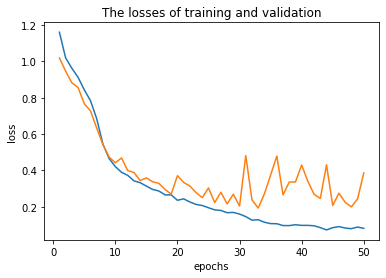

In [16]:
plt.plot(epochs_, loss, label = 'training loss')
plt.plot(epochs_, val_loss, label = 'validation loss')
plt.title('The losses of training and validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

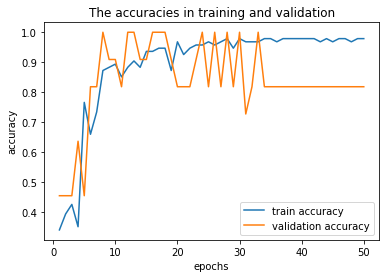

In [17]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'validation accuracy')
plt.title('The accuracies in training and validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### 8) 測試

In [18]:
from sklearn.metrics import accuracy_score
label = np.argmax(y, axis = 1)
pred = np.argmax(model.predict(X), axis = 1)
print(accuracy_score(label, pred))

0.96
